# EXPLORATION 

In [1]:
import pandas as pd
import numpy as np
import os
from env import hostname, user, password

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import wrangle as w
import warnings 
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

### <Span style = "color:green"> 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.



In [2]:
df = w.get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathroomcnt,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
taxvaluedollarcnt,2152371.0,461896.052361,699675.940049,1.00,188170.0000,327671.000,534527.0000,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
taxamount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00
propertylandusetypeid,2152864.0,261.000008,0.012268,261.00,261.0000,261.000,261.0000,279.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
 7   propertylandusetypeid         float64
dtypes: float64(8)
memory usage: 131.4 MB


In [5]:
df.shape

(2152864, 8)

In [6]:
df = w.prep_zillow(df)
df.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130214 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqft        float64
 3   home_value  float64
 4   year_built  float64
 5   sale_tax    float64
 6   fips        float64
dtypes: float64(7)
memory usage: 130.0 MB


In [8]:
df = w.dtype_zillow(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130214 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    int64  
 1   bathrooms   int64  
 2   sqft        int64  
 3   home_value  float64
 4   year_built  object 
 5   sale_tax    float64
 6   fips        object 
dtypes: float64(2), int64(3), object(2)
memory usage: 130.0+ MB


In [9]:
df.shape

(2130214, 7)

In [10]:
df.isnull().sum()


bedrooms      0
bathrooms     0
sqft          0
home_value    0
year_built    0
sale_tax      0
fips          0
dtype: int64

### <Span style = "color:green"> 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [11]:
train, validate, test = w.split_zillow(df)



In [12]:
print(f'Train shape: {train.shape}')
print(f'Validate shape: {validate.shape}')
print(f'Test shape: {test.shape}')

Train shape: (1278128, 7)
Validate shape: (426043, 7)
Test shape: (426043, 7)


In [46]:
train.shape

(1278128, 7)

In [ ]:
train.fips.value_counts()

In [ ]:
train.bathrooms.value_counts()

In [45]:
train.sqft.value_counts()

1200     3133
1080     2626
1120     2564
1400     2288
1440     2185
         ... 
15878       1
10396       1
6134        1
14927       1
10154       1
Name: sqft, Length: 9528, dtype: int64

### <Span style = "color:green"> 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

### Stratify on fips by County

In [13]:
# Replace FIPS codes with county names
train['fips'] = train['fips'].replace(6037, 'Los_Angelos')
train['fips'] = train['fips'].replace(6059, 'Orange_County')
train['fips'] = train['fips'].replace(6111, 'Ventura_County')

In [18]:
def plot_variable_pairs(df):
    # Select a random sample from the train dataset
    df_sample = df.sample(n=1000)
    sns.pairplot(df_sample, hue="fips", markers=None)
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


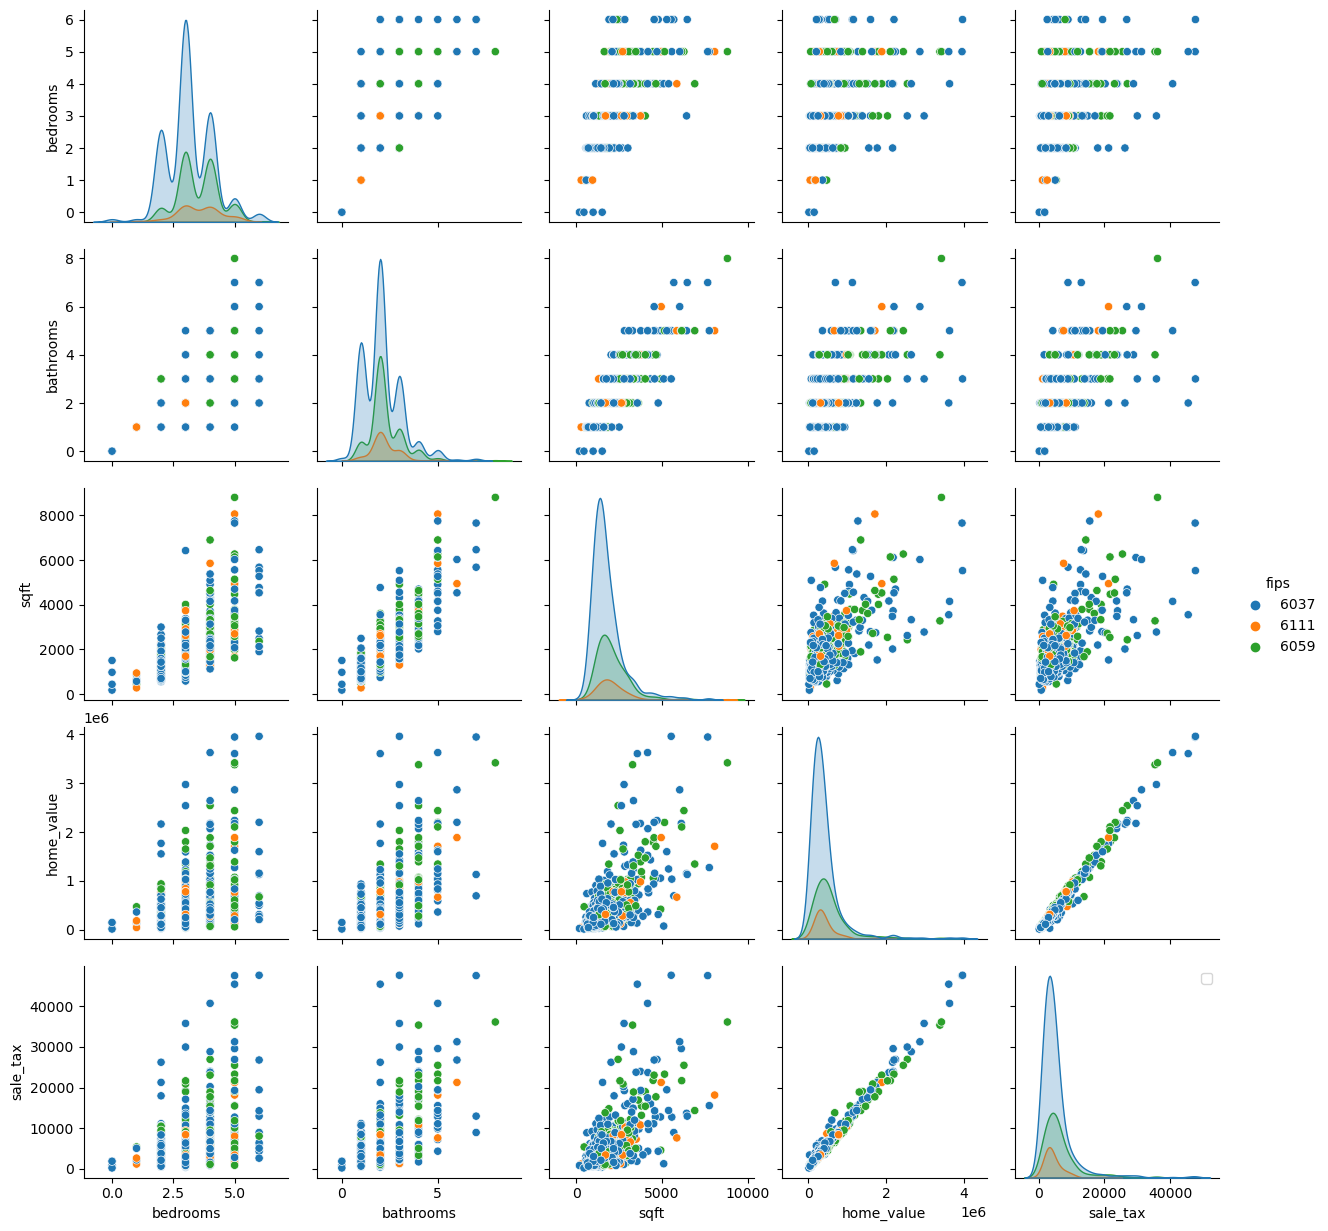

In [19]:
plot_variable_pairs(train)

### <Span style = "color:green"> 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [ ]:
features = ["bedrooms","bathrooms","sqft","year_built","sale_tax"]

In [ ]:
for feature in features:
    sns.lmplot(data=train.sample(1000), hue = 'fips', feature= 'fips', y='home_value', x = feature, line_kws={'color': 'red'})

In [ ]:
for feature in features:
    sns.lmplot(x = feature, y = 'home_value', hue= "fips", data = train, x_bins=20)

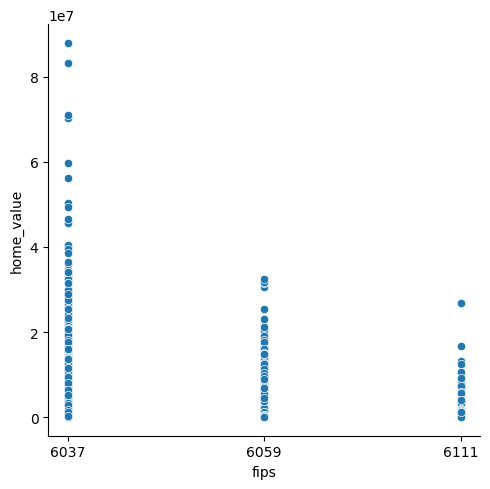

In [42]:
sns.relplot(x=train.fips , y=train.home_value)

In [28]:
def plot_categorical_and_continuous_vars(df, categorical_feature, continuous_feature):
    # Select a random sample from the train dataset
    df_sample = df.sample(n=1000)
#     # Selected features and hue
#     categorical_feature = ["bedrooms", "bathrooms","sqft"]
#     continuous_feature = ["home_value","sale_tax"]
#     hue = "fips"
#     fig, axs = plt.subplots(1,3, figsize=(18,8))
    # Plot 1: Box plot
    plt.figure(figsize=(18, 8))dd
    sns.boxplot(data=df, x=categorical_feature, y=continuous_feature, hue=hue)
    plt.title("Box Plot")
    plt.show()
    
    # Plot 2: Violin plot
    plt.figure(figsize=(18, 8))
    sns.violinplot(data=df, x=categorical_feature, y=continuous_feature, hue=hue, split=True)
    plt.title("Violin Plot")
    plt.show()
    
    # Plot 3: Swarm plot
    plt.figure(figsize=(18, 8))
    sns.swarmplot(data=df, x=categorical_feature, y=continuous_feature, hue=hue)
    plt.title("Swarm Plot")
    plt.show()
    
#     df = df.sample(n=1000)
    
#     fig, axs = plt.subplots(1,3, figsize=(18,8))
    
#     sns.stripplot(ax=axs[0], x=cat_var_col, y=con_var_col, data=df)
#     axs[0].set_title('stripplot')
    
#     sns.boxplot(ax=axs[1], x=cat_var_col, y=con_var_col, data=df)
#     axs[1].set_title('boxplot')
    
#     sns.swarmplot(ax=axs[2], x=cat_var_col, y=con_var_col, data=df, s=1)
#     axs[2].set_title('swarmplot')
    

TypeError: lmplot() got an unexpected keyword argument 'feature'

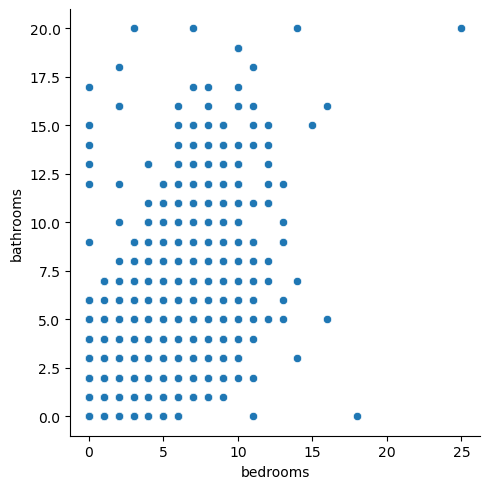

In [39]:
sns.relplot(x=train.bedrooms , y=train.bathrooms, data=train)
features = [ "fips"]
for feature in features:
    sns.lmplot(data=train.sample(1000), hue = 'fips', feature= 'fips', y='sale_tax', x = feature, line_kws={'color'})

In [ ]:
def plot_categorical_and_continuous_vars(df, categorical_feature, continuous_feature):
    # Select a random sample from the train dataset
    df_sample = df.sample(n=1000)
    # Selected features and hue
    categorical_feature = ["bedrooms", "bathrooms","sqft"]
    continuous_feature = ["home_value","sale_tax"]
    hue = "fips"
#     fig, axs = plt.subplots(1,3, figsize=(18,8))
    # Plot 1: Box plot
    plt.figure(figsize=(18, 8))
    sns.boxplot(data=df, x=categorical_feature, y=continuous_feature, hue=hue)
    plt.title("Box Plot")
    plt.show()
    
    # Plot 2: Violin plot
    plt.figure(figsize=(18, 8))
    sns.violinplot(data=df, x=categorical_feature, y=continuous_feature, hue=hue, split=True)
    plt.title("Violin Plot")
    plt.show()
    
    # Plot 3: Swarm plot
    plt.figure(figsize=(18, 8))
    sns.swarmplot(data=df, x=categorical_feature, y=continuous_feature, hue=hue)
    plt.title("Swarm Plot")
    plt.show()

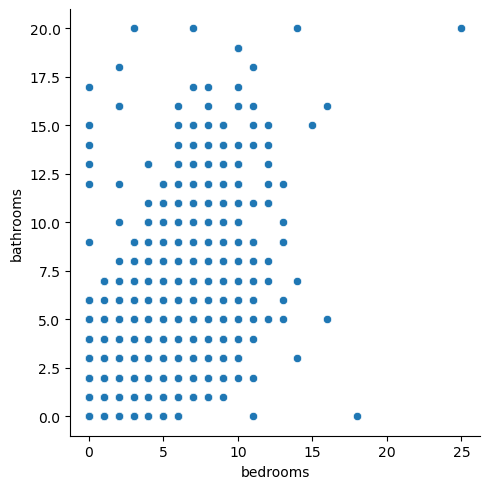

In [41]:
sns.relplot(x=train.bedrooms , y=train.bathrooms, data=train)

In [ ]:
sns.swarmplot(x=train.fips, y=train.sqft)

<Axes: xlabel='fips', ylabel='sqft'>

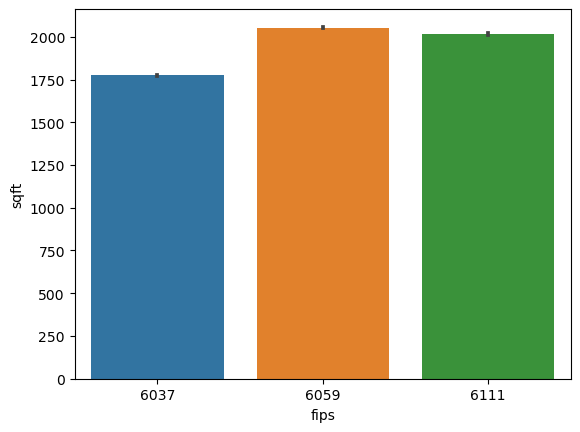

In [47]:
sns.barplot(x=train.fips, y=train.sqft)

The plot_categorical_and_continuous_vars function takes a DataFrame (Train), a categorical feature name, and a continuous feature name as inputs. It generates three plots (box plot, violin plot, and swarm plot) to visualize the relationship between the category



### <Span style = "color:green"> 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

### <Span style = "color:green"> 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

### <Span style = "color:green"> 7. Come up with some initial hypotheses based on your goal of predicting property value.

### <Span style = "color:green"> 8. Visualize all combinations of variables in some way.

### <Span style = "color:green"> 9. Run the appropriate statistical tests where needed.

### <Span style = "color:green"> 10. What independent variables are correlated with the dependent variable, home value?

### <Span style = "color:green"> 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

### <Span style = "color:green"> 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

### <Span style = "color:green"> 13. Explore your dataset with any other visualizations you think will be helpful.